In [ ]:
def vaporcode(s):
    for i in range(0,len(s)):
        vapor = []
        if s[i].isalpha() is True:
            vapor.append(s[i]) 
            print(list(vapor))

In [ ]:
def vaporcode(s):
    s = s.upper().replace(' ','').replace('','  ')
    print(s)

In [ ]:
vaporcode(s)

In [ ]:
txt[-1::-1]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./Census-data/2017_employment.csv')

In [ ]:
df.shape

In [ ]:
#finding where DC located
last_n_column  = df.iloc[5:10,25:40]
last_n_column.head()

In [ ]:
df_t = df.T

In [ ]:
#Utilized percent convert on other project code to obtain SAT participation data
test=df_T.map(percent_convert)

In [ ]:
df_unemployment = df_t[9]

In [ ]:
df_unemployment.head()

In [ ]:

def employ(df):
    strings = []
    for i in range(209):
        if df_unemployment[i][-1] in '%':
            strings.append(df_unemployment[i])
    return(strings)
            
employ(df_unemployment)
        

In [ ]:
#convert new unemployment column to integer
df_unemployment_new = df_unemployment.apply(employ)


In [ ]:
# determining length of column to find if PR is included
len(df_unemployment_new[1])

In [ ]:
#Turn the list into an array
df_unemployment_array = np.array(df_unemployment_new)

In [ ]:
df_unemployment_array

In [ ]:
#creating function to remove percent sign
def percent_convert(num):
    return float(num.replace('%',''))

In [ ]:
#Utilizing list comprehension on column to apply percent_convert function
df_unemployment_listcomp=[percent_convert(each) for each in df_unemployment_new[1]]
df_unemployment_listcomp[10:12]

In [ ]:
#discovering column number PR is in the orginal dataframe
#use this information to eventually drop PR
last_n_column  = df.iloc[5:10,25:40]
last_n_column.head()

In [51]:
#find DC and PR row based their listed unemployment rate
df_unemployment_listcomp[8]

6.6

In [ ]:
#convert to df b/c I cant drop from a list
df_converttodf = pd.DataFrame(df_unemployment_listcomp)

In [52]:
df_converttodf.head(3)

,0
0,5.8
1,7.6
2,5.8


In [ ]:
#drop PR
df_noPR = df_converttodf.drop(51)

In [ ]:
#Check length to confirm PR removed

len(df_noPR)

In [ ]:
#Read enrollment data
enrollment_2017 = pd.read_csv('./Census-data/2017_enrollment_2.csv')

#export enrollment data
enrollment_2017.to_csv("./data/enrollment_2017.csv", index=False)

In [ ]:
#export data with index = false
df_noPR.to_csv("./data/noPR.csv", index=False)
noPR = pd.read_csv("./data/noPR.csv")

In [ ]:
noPR.head()

In [ ]:
#read 2017 and 2018
sat_2017 = pd.read_csv("data/sat_2017.csv")
sat_2018 = pd.read_csv("data/sat_2018.csv")

In [ ]:
#read poverty census data
poverty_2017 = pd.read_csv('./Census-data/2017_poverty.csv')

In [55]:
#read enrollment census data
enrollment_2017 = pd.read_csv('./Census-data/2017_enrollment_2.csv')

In [56]:
enrollment_2017.head()

,State,Percent_enrollment
0,Alabama,21.7
1,Alaska,21.7
2,Arizona,21.8
3,Arkansas,21.7
4,California,20.4


In [ ]:
#drop first row
poverty_2017 = poverty_2017.drop(0)

In [ ]:
poverty_2017.head(3)

In [ ]:
#rename poverty columns
poverty_2017.rename(columns={
    'NAME': 'State_povery', 'S1701_C03_001E':'Percent_poverty'
}, inplace=True)

In [ ]:
#export data with index = false
poverty_2017.to_csv("./data/poverty_2017_2.csv", index=False)
poverty_2017_new = pd.read_csv("./data/poverty_2017_2.csv")
poverty_2017_new.head()

In [ ]:
#Merge 2017 and df_noPR
sat_2017_noPR = pd.merge(sat_2017,df_noPR, left_index=True, right_index=True, suffixes=['_2017','_2018'])
sat_2017_noPR.head(3)

In [53]:
#Merge sat_2017_noPR with poverty_2017
sat_unemploy_poverty = pd.merge(sat_2017_noPR, poverty_2017_new, left_index=True, right_index=True, suffixes=['_2017','_2018'])
sat_unemploy_poverty.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total,0,State_povery,Percent_poverty
0,Alabama,5%,593,572,1165,5.8,Alabama,16.9
1,Alaska,38%,547,533,1080,7.6,Alaska,11.1
2,Arizona,30%,563,553,1116,5.8,Arizona,14.9


In [61]:
#Merge sat_unemploy_poverty with enrollment_2017
sat_unemploy_poverty_enroll_2017_columns = pd.merge(sat_unemploy_poverty, enrollment_2017, left_index=True, right_index=True, suffixes=['_2017','_2018'])
sat_unemploy_poverty_enroll_2017_columns.head(3)

,State_2017,Participation,Evidence-Based Reading and Writing,Math,Total,0,State_povery,Percent_poverty,State_2018,Percent_enrollment
0,Alabama,5%,593,572,1165,5.8,Alabama,16.9,Alabama,21.7
1,Alaska,38%,547,533,1080,7.6,Alaska,11.1,Alaska,21.7
2,Arizona,30%,563,553,1116,5.8,Arizona,14.9,Arizona,21.8


In [62]:
#created a dataframe with state name, sat data, and census data
sat_unemploy_poverty_enroll_2017_columns = sat_unemploy_poverty_enroll_2017_columns[['State_2017','Participation','Math', 'Evidence-Based Reading and Writing', 'Total',0,'Percent_poverty','Percent_enrollment']].copy()

In [63]:
sat_unemploy_poverty_enroll_2017_columns.head()

,State_2017,Participation,Math,Evidence-Based Reading and Writing,Total,0,Percent_poverty,Percent_enrollment
0,Alabama,5%,572,593,1165,5.8,16.9,21.7
1,Alaska,38%,533,547,1080,7.6,11.1,21.7
2,Arizona,30%,553,563,1116,5.8,14.9,21.8
3,Arkansas,3%,594,614,1208,5.6,16.4,21.7
4,California,53%,524,531,1055,5.9,13.3,20.4


In [ ]:
bunch of histograms, highest and lowest, correlations, 

In [ ]:
#highest and lowest

In [ ]:
#correlation

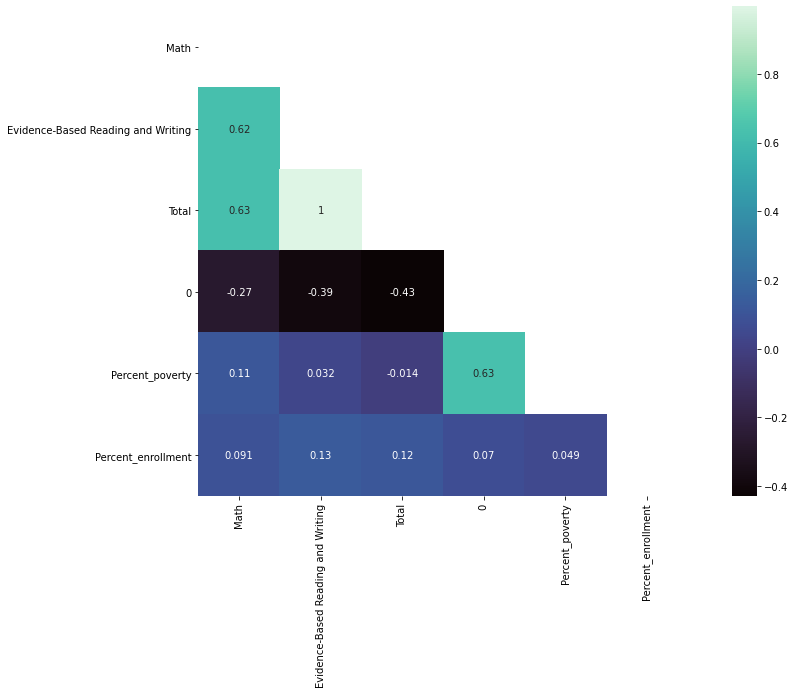

In [64]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html
import matplotlib.pyplot as plt
import seaborn as sns

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = sat_unemploy_poverty_enroll_2017_columns.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True);

### Scatterplot

In [ ]:

# Size
plt.figure(figsize = (12, 5))

plt.scatter(sat_unemploy_poverty_2017_columns['Percent_poverty'],
            sat_unemploy_poverty_2017_columns['0'])

# Create a descriptive title
plt.title('Percent_poverty vs. Unemployment')
# Add axis labels
plt.xlabel('Percent_poverty')
plt.ylabel('Unemployment');

In [ ]:

# Size
plt.figure(figsize = (12, 5))

plt.scatter(sat_unemploy_poverty_2017_columns['0'],
            sat_unemploy_poverty_2017_columns['Total_2017'])

# Create a descriptive title
plt.title('Percent_poverty vs. Total_2017')
# Add axis labels
plt.xlabel('0')
plt.ylabel('Total_2017');

In [ ]:

# Size
plt.figure(figsize = (12, 5))

plt.scatter(sat_unemploy_poverty_2017_columns['0'],
            sat_unemploy_poverty_2017_columns['Math_2017'])

# Create a descriptive title
plt.title('Percent_poverty vs. Total_2017')
# Add axis labels
plt.xlabel('0')
plt.ylabel('Math_2017');

In [ ]:

# Size
plt.figure(figsize = (12, 5))

plt.scatter(sat_unemploy_poverty_2017_columns['0'],
            sat_unemploy_poverty_2017_columns['Evidence-Based Reading and Writing_2017'])

# Create a descriptive title
plt.title('Unemployment vs. Read/Writing_2017')
# Add axis labels
plt.xlabel('Unemployment')
plt.ylabel('Read/Writing_2017');

In [ ]:
sat_unemploy_poverty_enroll_2017_columns.head()

In [ ]:

# Size
plt.figure(figsize = (12, 5))

plt.scatter(sat_unemploy_poverty_enroll_2017_columns['Unemploy_2017'],
            sat_unemploy_poverty_enroll_2017_columns['Total_2017'])

# Create a descriptive title
plt.title('2017 Unemployment vs. SAT 2017 Total score')
# Add axis labels
plt.xlabel('2017 Unemployment')
plt.ylabel('SAT 2017 Total score');

In [ ]:
sat_unemploy_poverty_enroll_2017_columns.head()

In [ ]:

# Size
plt.figure(figsize = (12, 5))

# Plot it
plt.hist(sat_unemploy_poverty_enroll_2017_columns['Unemploy_2017'], color = 'teal') # colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# Create a descriptive title
plt.title('Distribution of Unemployment 2017');
# Do we need axis lables here?

In [ ]:
sat_unemploy_poverty_enroll_2017_columns['Percent_enrollment_2017'].sort_values()

In [ ]:
sat_unemploy_poverty_enroll_2017_columns.rename(columns={
    'Evidence-Based Reading and Writing_2017': 'Read/Write_2017','0':'Unemploy_2017'
}, inplace=True)

In [ ]:
sat_unemploy_poverty_enroll_2017_columns.quantile([.25, .5, .75], axis = 0)

In [ ]:
sat_unemploy_poverty_enroll_2017_columns.describe()

In [ ]:
#rename new dataframe columns
sat_unemploy_poverty_2017_columns.rename(columns={
    'Evidence-Based Reading and Writing_2017': 'Read/Write_2017','0':'Unemploy_2017'
}, inplace=True)

In [ ]:
sat_unemploy_poverty_2017_columns_new.head(3)

In [ ]:
sat_unemploy_poverty_2017_columns_new = sat_unemploy_poverty_2017_columns

In [ ]:
sat_unemploy_poverty_2017_columns_new.head()

In [ ]:
#function utilized for .map of Participation column

def convert_percentage(num):
    return int(num.replace('%', ''))

In [ ]:
#Using .apply to create the Participation column in decimal format
sat_unemploy_poverty_2017_columns_new['Participation_2017'] = sat_unemploy_poverty_2017_columns_new
['Participation_2017'].map(convert_percentage)
sat_unemploy_poverty_2017_columns_new.head()

In [ ]:
sat_unemploy_poverty_2017_columns_new.drop('Participation_2017')